In [1]:
# Initial parameters
w = 50  # Initial price
learn_rate = 0.01  # Learning rate
momentum = 0.9  # Momentum parameter

# Define revenue and cost functions
def revenue(w):
    return -0.2 * w**2 + 50 * w - 200

def cost(w):
    return 0.1 * w**2 - 10 * w + 100

# Calculate gradients of revenue and cost functions
def revenue_gradient(w):
    return -0.4 * w + 50

def cost_gradient(w):
    return 0.2 * w - 10

# Initialize velocities
v_w = 0

# Optimization loop
for i in range(3):
    # Calculate gradients
    revenue_grad = revenue_gradient(w)
    cost_grad = cost_gradient(w)
    
    # Update velocities
    v_w = momentum * v_w - learn_rate * (revenue_grad + cost_grad)
    
    # Update price
    w += v_w
    
    # Print iteration details
    print(f"Iteration {i+1} - Price: {w:.2f}")

# Final optimal price
print("Final Optimal Price:", w)


Iteration 1 - Price: 49.70
Iteration 2 - Price: 49.13
Iteration 3 - Price: 48.31
Final Optimal Price: 48.3141188


In [39]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


In [40]:
import pandas as pd
data=pd.read_csv('/Users/reeve/Downloads/archive (9)/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


In [42]:
# Convert target labels to numerical labels
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['Species'])


In [43]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [44]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
target           0
dtype: int64

In [45]:
data.shape

(150, 7)

In [46]:
# Assuming 'data' is your DataFrame containing the Iris dataset
# Replace 'data' with the actual DataFrame name if it's different

data.drop(data.columns[5], axis=1, inplace=True)


In [47]:
data.drop(data.columns[0], axis=1, inplace=True)

In [48]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [49]:
from scipy import stats

In [50]:

def drop_outlier(data, col_name):
    z_scores = np.abs(stats.zscore(data[col_name]))
    threshold = 2.5
    data.drop(data.index[np.where(z_scores > threshold)], inplace=True)

# Assuming 'data' is your DataFrame containing the Iris dataset
# Replace 'data' with the actual DataFrame name if it's different

# Drop outliers for each feature
drop_outlier(data, 'SepalLengthCm')
drop_outlier(data, 'SepalWidthCm')
drop_outlier(data, 'PetalLengthCm')
drop_outlier(data, 'PetalWidthCm')

### Standardising the data

In [51]:

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize all columns in the dataset
data_standardized = scaler.fit_transform(data)

# Convert the standardized array back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)

# Display the first few rows of the standardized data
print(data_standardized.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm    target
0      -0.899231      1.129627      -1.365931      -1.33284 -1.245682
1      -1.140110     -0.090700      -1.365931      -1.33284 -1.245682
2      -1.380990      0.397431      -1.423086      -1.33284 -1.245682
3      -1.501430      0.153365      -1.308776      -1.33284 -1.245682
4      -1.019671      1.373692      -1.365931      -1.33284 -1.245682


### Splitting the target and predictors into training and testing

In [57]:

# Split the dataset into features (X) and target variable (Y)
X = data.drop(columns='target')
Y = data['target']

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (118, 4)
Shape of x_test: (30, 4)
Shape of y_train: (118,)
Shape of y_test: (30,)


### Fitting model with  L1  Regularization

In [58]:
model = Sequential([ 
    Dense(input_dim=4,units=128, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [60]:
model.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step - loss: 13.3678 - val_loss: 13.2871
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.6990 - val_loss: 12.7791
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.3811 - val_loss: 12.3038
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.9427 - val_loss: 11.7812
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.3256 - val_loss: 11.3233
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.0446 - val_loss: 10.9586
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7743 - val_loss: 10.6516
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7391 - val_loss: 10.4065
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.4468 - val_loss: 10.2249
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.4067 - val_loss: 10.0945
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.1759 - val_loss: 9.9920
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step -

### Fitting model with L2 Regularization

In [61]:
model1 = Sequential([ 
    Dense(input_dim=4,units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model1.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [63]:
model1.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - loss: 4.0826 - val_loss: 3.9333
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.6537 - val_loss: 3.2713
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0177 - val_loss: 2.7597
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.5659 - val_loss: 2.3640
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.3592 - val_loss: 2.1212
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.1498 - val_loss: 1.9415
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.9882 - val_loss: 1.8034
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.8696 - val_loss: 1.7048
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.9827 - val_loss: 1.6411
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8348 - val_loss: 1.6011
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.7191 - val_loss: 1.5721
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9546 - val_l

### Fitting model with Elastic Net Regularization

In [64]:
model2 = Sequential([ 
    Dense(input_dim=4,units=128, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=64, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=32, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dropout(0.2),
    Dense(units=1, activation='linear')
]) 

/Users/reeve/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error') 

In [66]:
model2.fit(x_train, y_train, epochs=100,  
          batch_size=500,  
          validation_split=0.2) 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - loss: 11.4856 - val_loss: 11.1257
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.2349 - val_loss: 10.8752
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.2919 - val_loss: 10.7086
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.9320 - val_loss: 10.5833
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.8718 - val_loss: 10.4682
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.8450 - val_loss: 10.3587
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.7488 - val_loss: 10.2680
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.6678 - val_loss: 10.1885
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4265 - val_loss: 10.1108
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.3782 - val_loss: 10.0239
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 10.2949 - val_loss: 9.9258
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step -

### Predicting values

In [67]:
Y_PRED=model.predict(x_test)
Y_PRED1=model1.predict(x_test)
Y_PRED2=model2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


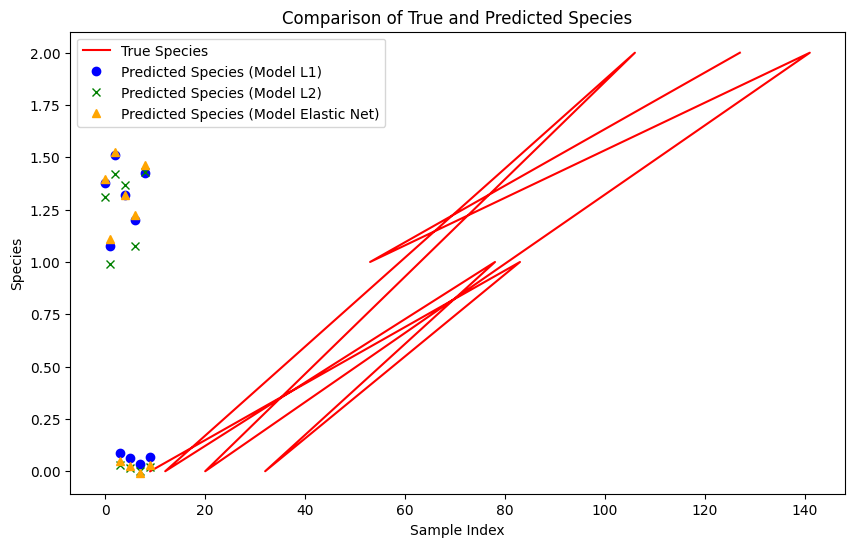

In [69]:
import matplotlib.pyplot as plt

# Assuming Y_PRED, Y_PRED1, and Y_PRED2 contain the predictions from your three models
# Replace them with the actual variables containing the predictions if different

plt.figure(figsize=(10, 6))
plt.plot(y_test[:10], color='red', label='True Species')
plt.plot(Y_PRED[:10], 'o', color='blue', label='Predicted Species (Model L1)')
plt.plot(Y_PRED1[:10], 'x', color='green', label='Predicted Species (Model L2)')
plt.plot(Y_PRED2[:10], '^', color='orange', label='Predicted Species (Model Elastic Net)')
plt.xlabel('Sample Index')
plt.ylabel('Species')
plt.title('Comparison of True and Predicted Species')
plt.legend()
plt.show()


### Comparing all the models based on Mean Square Error

<BarContainer object of 3 artists>

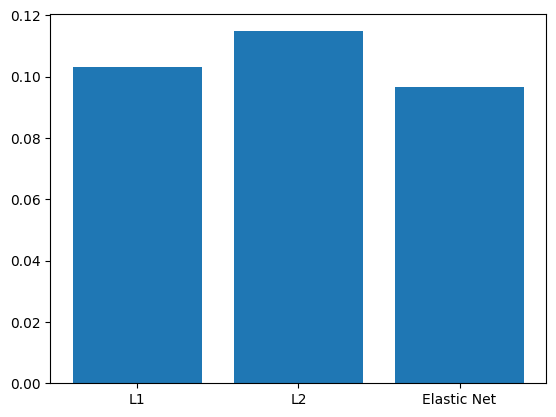

In [73]:
from sklearn.metrics import mean_squared_error
models=['L1','L2','Elastic Net']
value=[mean_squared_error(y_test,Y_PRED),mean_squared_error(y_test,Y_PRED1),mean_squared_error(y_test,Y_PRED2)]
import matplotlib.pyplot as plt
plt.bar(models,value)

### Comparing all the models based on Mean Absolute Error

<BarContainer object of 3 artists>

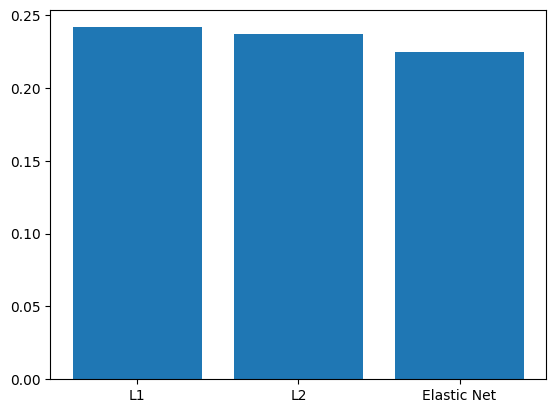

In [74]:
from sklearn.metrics import mean_absolute_error
values=[mean_absolute_error(y_test,Y_PRED),mean_absolute_error(y_test,Y_PRED1),mean_absolute_error(y_test,Y_PRED2)]
plt.bar(models,values)